In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,30)
import glob

# jtplot.style('onedork',figsize=(20, 10), fscale=2)
# jtplot.style('grade3', fscale=1.5, spines=False)
jtplot.style('grade3',figsize=(20, 10), fscale=2, spines=False)

In [38]:
reward_files = np.sort(glob.glob('/data/loki_1/data/BIDS/sub-0*/ses-*/beh/*task-lokicat*.tsv'))[1:-1]

In [40]:
reward_file_dfs = [pd.read_csv(reward_file,sep=r'\,|\t',engine='python') for reward_file in reward_files]
reward_file_df = pd.concat(reward_file_dfs, axis=0).rename(columns=lambda x: x.strip())

In [41]:
reward_file_df.head()

,trial,subj_id,reward_code,condition,run,LR_choice,value_accuracy,value_LR_solution,reward,cumulative_reward,...,p_LR_solution,p_id_solution,id_choice,stim_duration,stim_onset,stim_offset,abs_response_time,epoch_length,epoch_trial,epoch_number
0,0.0,790.0,6.0,8510.0,1.0,NaN,NaN,76.0,0.0,25.0,...,76.0,102.0,NaN,1.499981,0.016024,1.516005,0.766906,7.0,0.0,0.0
1,1.0,790.0,6.0,8510.0,1.0,82.0,0.0,76.0,0.0,24.0,...,76.0,102.0,109.0,1.499418,8.364996,9.864414,8.990787,7.0,1.0,0.0
2,2.0,790.0,6.0,8510.0,1.0,NaN,NaN,82.0,0.0,19.0,...,76.0,102.0,NaN,1.500073,16.397269,17.897342,17.147682,7.0,2.0,0.0
3,3.0,790.0,6.0,8510.0,1.0,82.0,1.0,82.0,0.0,19.0,...,82.0,102.0,102.0,1.500250,27.095648,28.595898,27.768674,7.0,3.0,0.0
4,4.0,790.0,6.0,8510.0,1.0,76.0,1.0,76.0,3.0,22.0,...,76.0,102.0,102.0,1.499424,37.994013,39.493437,38.608361,7.0,4.0,0.0


In [42]:
reward_file_df.groupby(['subj_id', 'reward_code'])['run'].unique()

subj_id  reward_code
790.0    0.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         1.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         2.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         3.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         4.0                 [2.0, 3.0, 4.0, 5.0]
         5.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         6.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         7.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         8.0            [1.0, 2.0, 3.0, 4.0, 5.0]
811.0    1.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         3.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         4.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         5.0            [1.0, 2.0, 3.0, 4.0, 5.0]
813.0    0.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         1.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         2.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         3.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         4.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         5.0            [1.0, 2.0, 3.0, 4.0, 5.0]
         6.0            [1.0,

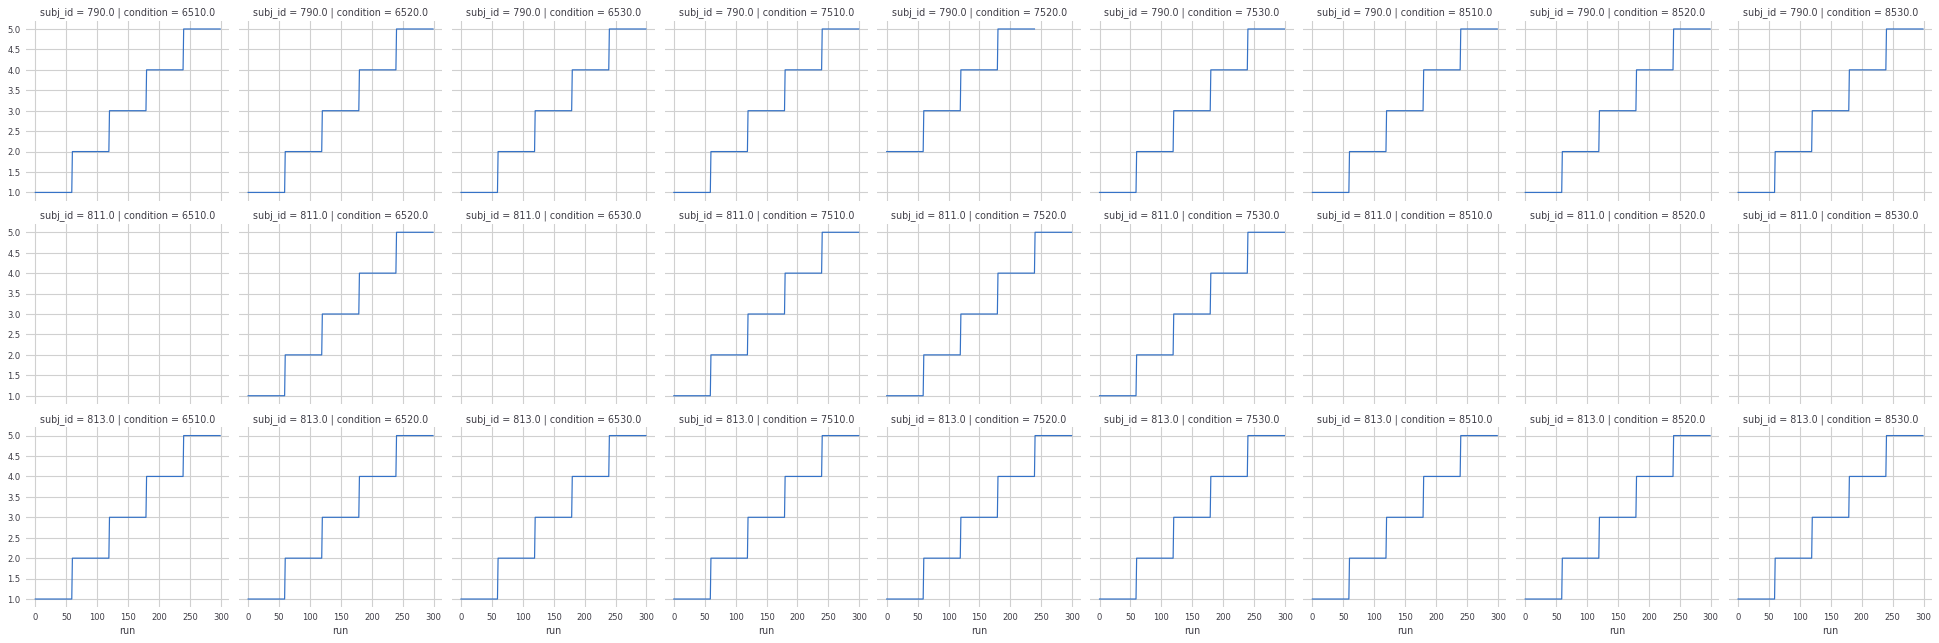

In [43]:
jtplot.style('grade3', fscale=0.8, spines=False)

# check runs are in sequence 
g = sns.FacetGrid(data=reward_file_df, col='condition', row='subj_id')
g.map(plt.plot, 'run')

In [44]:
# check that stim offset > stim onset 
(reward_file_df.stim_offset > reward_file_df.stim_onset).sum() == len(reward_file_df)

True

In [45]:
reward_file_df['condition_str'] = reward_file_df.condition.astype('str')

In [46]:
reward_file_df['p_optimal'] = [condition_str[0:2] for condition_str in reward_file_df.condition_str]

In [47]:
reward_file_df['lambda_val'] = [condition_str[2:4] for condition_str in reward_file_df.condition_str]

Text(0.5, 1.08, 'RT distributions')

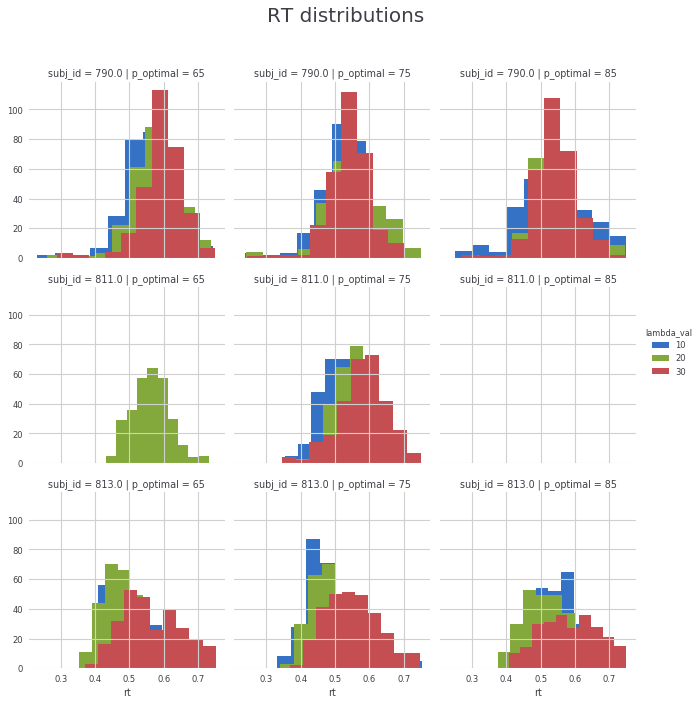

In [48]:
g = sns.FacetGrid(data=reward_file_df, col='p_optimal', row='subj_id', hue='lambda_val')
g.map(plt.hist, 'rt')
plt.xlabel('rt')
g.add_legend()
g.fig.suptitle('RT distributions', y=1.08, fontsize=20) # can also get the figure from plt.gcf()


In [49]:
reward_file_df = reward_file_df.rename(columns={"trial": "run_trial"})

In [50]:
n_trials = reward_file_df.groupby('condition').run_trial.count().unique()[0]

In [51]:
# reward_file_df['trial'] = np.tile(range(n_trials), )

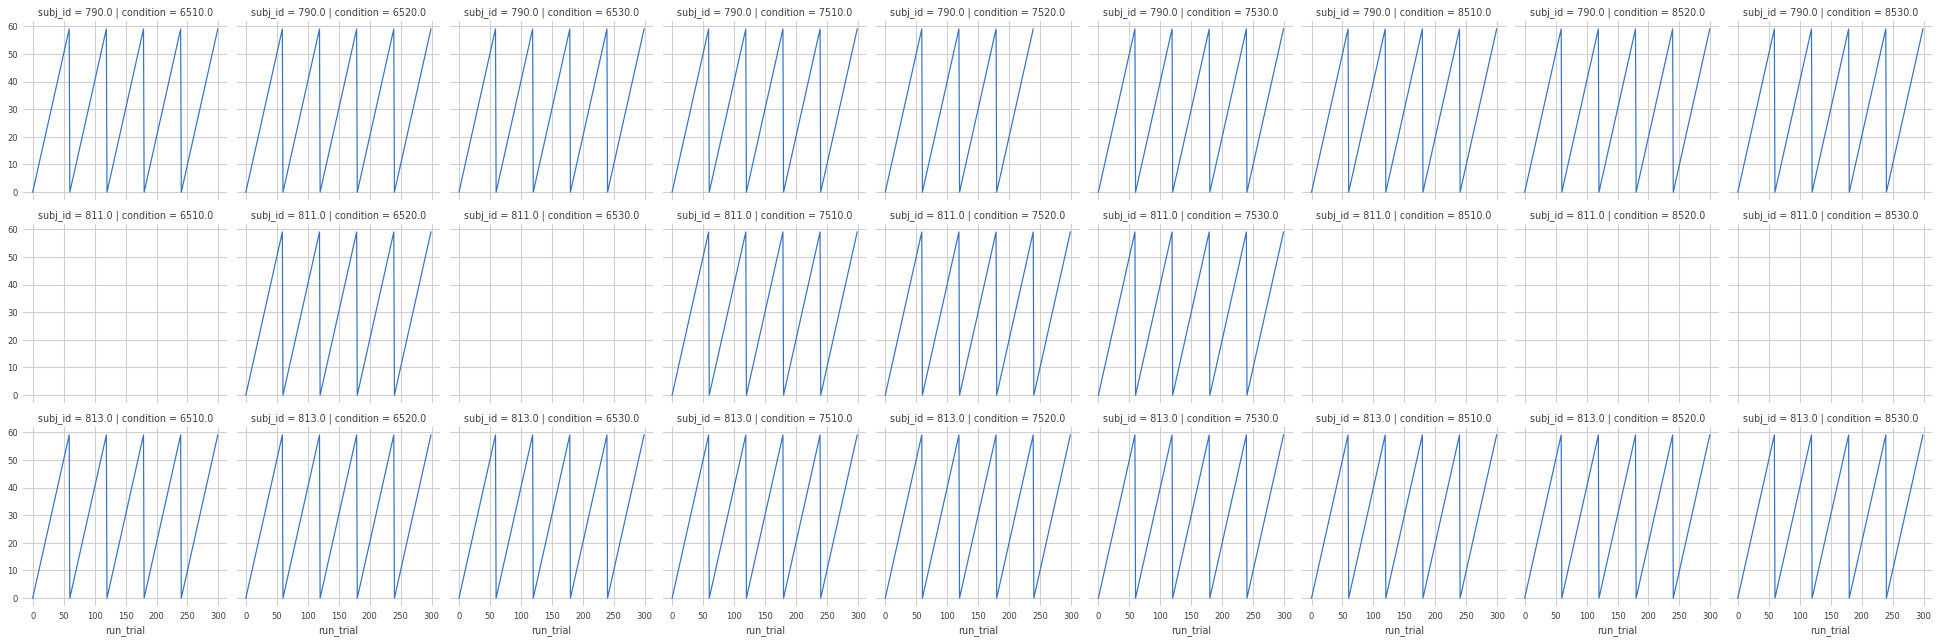

In [52]:
g = sns.FacetGrid(data=reward_file_df, col='condition', row='subj_id')
g.map(plt.plot, 'run_trial')

In [53]:
# g = sns.FacetGrid(data=reward_file_df, col='condition', row='subj_id')
# g.map(plt.plot, 'trial')

In [54]:
reward_file_df_subset = reward_file_df.loc[reward_file_df.epoch_trial <= 8]

Text(0.5, 1.08, 'Reaction Time')

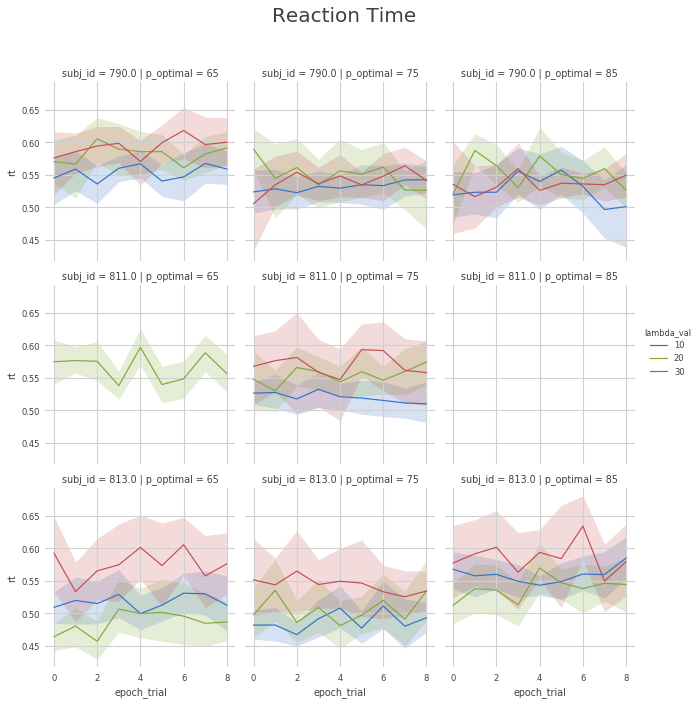

In [55]:
g = sns.FacetGrid(data=reward_file_df_subset, col='p_optimal', hue='lambda_val', row='subj_id') # time series for accuracy 
g.map(sns.lineplot, 'epoch_trial', 'rt')
g.add_legend()
g.fig.suptitle('Reaction Time', y=1.08, fontsize=20) # can also get the figure from plt.gcf()


Text(0.5, 1.08, 'Accuracy')

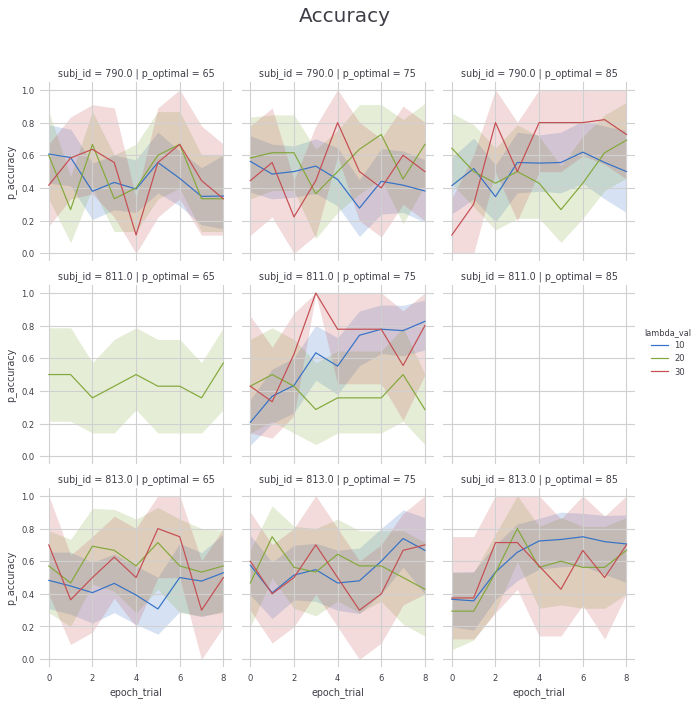

In [56]:
g = sns.FacetGrid(data=reward_file_df_subset, col='p_optimal', hue='lambda_val', row='subj_id') # time series for accuracy 
g.map(sns.lineplot, 'epoch_trial', 'p_accuracy')
g.add_legend()
g.fig.suptitle('Accuracy', y=1.08, fontsize=20) # can also get the figure from plt.gcf()


/home/krista/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


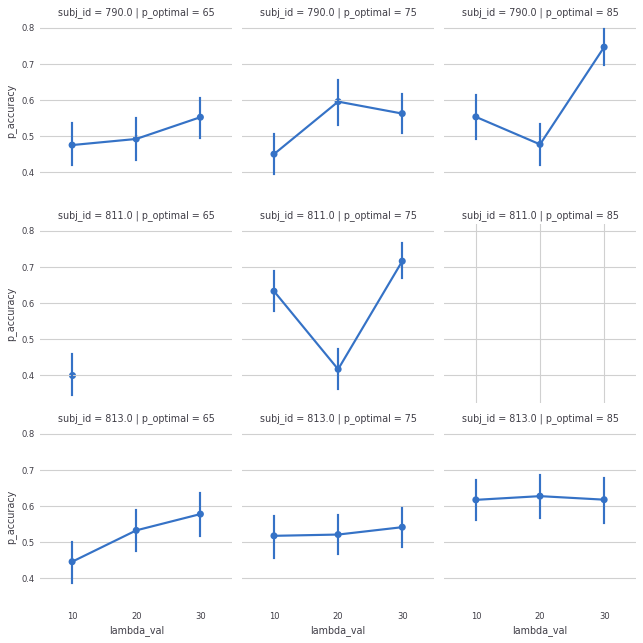

In [59]:
g = sns.FacetGrid(data=reward_file_df, col='p_optimal', row='subj_id') # time series for accuracy 
g.map(sns.pointplot, 'lambda_val', 'p_accuracy')
# g.fig.suptitle('Accuracy', y=1.08, fontsize=20) # can also get the figure from plt.gcf()


Text(0.5, 1.08, 'Reaction Time')

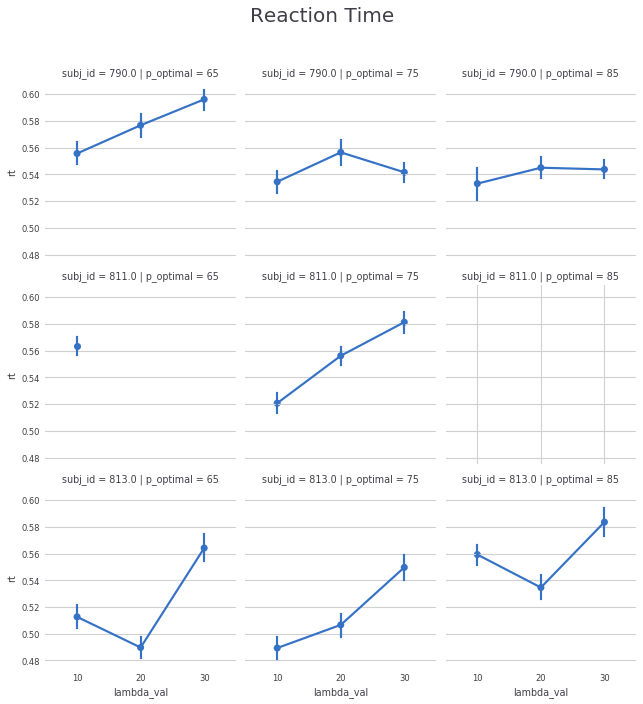

In [61]:
g = sns.FacetGrid(data=reward_file_df, col='p_optimal', row='subj_id') # time series for accuracy 
g.map(sns.pointplot, 'lambda_val', 'rt')
g.fig.suptitle('Reaction Time', y=1.08, fontsize=20) # can also get the figure from plt.gcf()


Text(0.5, 1.08, 'Pooled accuracy')

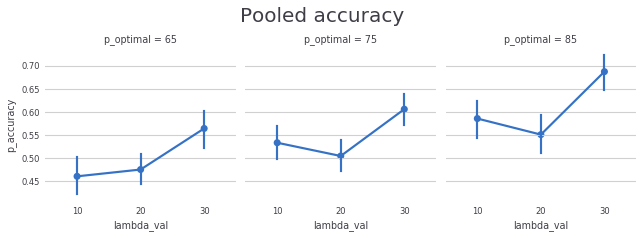

In [62]:
g = sns.FacetGrid(data=reward_file_df, col='p_optimal') # time series for accuracy 
g.map(sns.pointplot, 'lambda_val', 'p_accuracy')
g.fig.suptitle('Pooled accuracy', y=1.08, fontsize=20) # can also get the figure from plt.gcf()


Text(0.5, 1.08, 'Pooled Reaction Time')

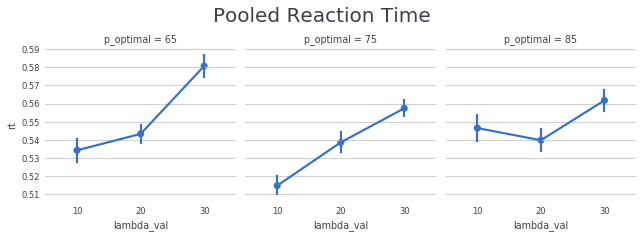

In [63]:
g = sns.FacetGrid(data=reward_file_df, col='p_optimal') # time series for accuracy 
g.map(sns.pointplot, 'lambda_val', 'rt')
g.fig.suptitle('Pooled Reaction Time', y=1.08, fontsize=20) # can also get the figure from plt.gcf()
